In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/27 [>.............................] - ETA: 16s - loss: 1.2061 - accuracy: 0.3828
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 1s 9ms/step - loss: 1.1500 - accuracy: 0.3461 - val_loss: 1.0618 - val_accuracy: 0.4331
Epoch 2/1000
 1/27 [>.............................] - ETA: 0s - loss: 1.0656 - accuracy: 0.3906
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 1.0704 - accuracy: 0.4004 - val_loss: 1.0372 - val_accuracy: 0.4519
Epoch 3/1000
 1/27 [>.............................] - ETA: 0s - loss: 1.0278 - accuracy: 0.4609
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 1.0438 - accuracy: 0.4414 - val_loss: 1.0069 - val_accuracy: 0.4924
Epoch 4/1000
 1/27 [>.............................] - ETA: 0s - loss: 1.0221 - accuracy: 0.5234


 1/27 [>.............................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8203
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7606 - val_loss: 0.3182 - val_accuracy: 0.9560
Epoch 29/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5151 - accuracy: 0.8203
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7705 - val_loss: 0.3103 - val_accuracy: 0.9569
Epoch 30/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5013 - accuracy: 0.7891
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7672 - val_loss: 0.3095 - val_accuracy: 0.9542
Epoch 31/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.6450 - accuracy: 0.7500
Epoch 31

 1/27 [>.............................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7891
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.8133 - val_loss: 0.2218 - val_accuracy: 0.9704
Epoch 56/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4413 - accuracy: 0.8438
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.8106 - val_loss: 0.2072 - val_accuracy: 0.9739
Epoch 57/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7578
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8211 - val_loss: 0.2103 - val_accuracy: 0.9704
Epoch 58/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8281
Epoch 58

 1/27 [>.............................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8203
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8346 - val_loss: 0.1880 - val_accuracy: 0.9793
Epoch 83/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5163 - accuracy: 0.8047
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8316 - val_loss: 0.1836 - val_accuracy: 0.9811
Epoch 84/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8672
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8451 - val_loss: 0.1879 - val_accuracy: 0.9757
Epoch 85/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8516
Epoch 85

 1/27 [>.............................] - ETA: 0s - loss: 0.4863 - accuracy: 0.8438
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8472 - val_loss: 0.1810 - val_accuracy: 0.9811
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8516
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8472 - val_loss: 0.1737 - val_accuracy: 0.9802
Epoch 111/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.4029 - accuracy: 0.8480
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8481 - val_loss: 0.1660 - val_accuracy: 0.9829
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8438
Ep

Epoch 136/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4030 - accuracy: 0.8359
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8481 - val_loss: 0.1601 - val_accuracy: 0.9838
Epoch 137/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8672
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8508 - val_loss: 0.1737 - val_accuracy: 0.9802
Epoch 138/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8438
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8657 - val_loss: 0.1716 - val_accuracy: 0.9811
Epoch 139/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3351 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9784


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 71ms/step
[0.6954564  0.21683562 0.08770806]
0


# 混同行列

35/35 [==============================] - 0s 747us/step


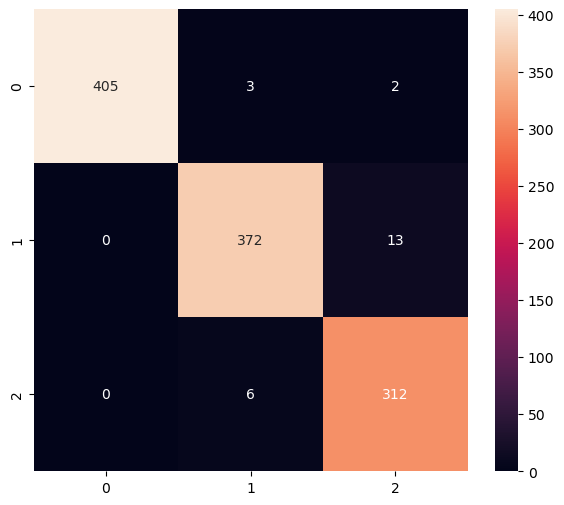

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       410
           1       0.98      0.97      0.97       385
           2       0.95      0.98      0.97       318

    accuracy                           0.98      1113
   macro avg       0.98      0.98      0.98      1113
weighted avg       0.98      0.98      0.98      1113



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpw8um84si\assets


INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpw8um84si\assets


6500

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.69545656 0.2168354  0.08770802]
0


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import csv
import copy
import argparse
import itertools
from collections import Counter
from collections import deque

import cv2 as cv
import numpy as np
import mediapipe as mp

from utils import CvFpsCalc
from model import KeyPointClassifier
from model import PointHistoryClassifier


def get_args():
    parser = argparse.ArgumentParser()

    parser.add_argument("--device", type=int, default=0)
    parser.add_argument("--width", help='cap width', type=int, default=960)
    parser.add_argument("--height", help='cap height', type=int, default=540)

    parser.add_argument('--use_static_image_mode', action='store_true')
    parser.add_argument("--min_detection_confidence",
                        help='min_detection_confidence',
                        type=float,
                        default=0.7)
    parser.add_argument("--min_tracking_confidence",
                        help='min_tracking_confidence',
                        type=int,
                        default=0.5)

    args = parser.parse_args()

    return args


def main():
    # 引数解析 #################################################################
    args = get_args()

    cap_device = args.device
    cap_width = args.width
    cap_height = args.height

    use_static_image_mode = args.use_static_image_mode
    min_detection_confidence = args.min_detection_confidence
    min_tracking_confidence = args.min_tracking_confidence

    use_brect = True

    # カメラ準備 ###############################################################
    cap = cv.VideoCapture(cap_device)
    cap.set(cv.CAP_PROP_FRAME_WIDTH, cap_width)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, cap_height)

    # モデルロード #############################################################
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(
        static_image_mode=use_static_image_mode,
        max_num_hands=1,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )

    keypoint_classifier = KeyPointClassifier()

    point_history_classifier = PointHistoryClassifier()

    # ラベル読み込み ###########################################################
    with open('model/keypoint_classifier/keypoint_classifier_label.csv',
              encoding='utf-8-sig') as f:
        keypoint_classifier_labels = csv.reader(f)
        keypoint_classifier_labels = [
            row[0] for row in keypoint_classifier_labels
        ]
    with open(
            'model/point_history_classifier/point_history_classifier_label.csv',
            encoding='utf-8-sig') as f:
        point_history_classifier_labels = csv.reader(f)
        point_history_classifier_labels = [
            row[0] for row in point_history_classifier_labels
        ]

    # FPS計測モジュール ########################################################
    cvFpsCalc = CvFpsCalc(buffer_len=10)

    # 座標履歴 #################################################################
    history_length = 16
    point_history = deque(maxlen=history_length)

    # フィンガージェスチャー履歴 ################################################
    finger_gesture_history = deque(maxlen=history_length)

    #  ########################################################################
    mode = 0

    while True:
        fps = cvFpsCalc.get()

        # キー処理(ESC：終了) #################################################
        key = cv.waitKey(10)
        if key == 27:  # ESC
            break
        number, mode = select_mode(key, mode)

        # カメラキャプチャ #####################################################
        ret, image = cap.read()
        if not ret:
            break
        image = cv.flip(image, 1)  # ミラー表示
        debug_image = copy.deepcopy(image)

        # 検出実施 #############################################################
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        #  ####################################################################
        if results.multi_hand_landmarks is not None:
            for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
                                                  results.multi_handedness):
                # 外接矩形の計算
                brect = calc_bounding_rect(debug_image, hand_landmarks)
                # ランドマークの計算
                landmark_list = calc_landmark_list(debug_image, hand_landmarks)

                # 相対座標・正規化座標への変換
                pre_processed_landmark_list = pre_process_landmark(
                    landmark_list)
                pre_processed_point_history_list = pre_process_point_history(
                    debug_image, point_history)
                # 学習データ保存
                logging_csv(number, mode, pre_processed_landmark_list,
                            pre_processed_point_history_list)

                # ハンドサイン分類
                hand_sign_id = keypoint_classifier(pre_processed_landmark_list)
                if hand_sign_id == 2:  # 指差しサイン
                    point_history.append(landmark_list[8])  # 人差指座標
                else:
                    point_history.append([0, 0])

                # フィンガージェスチャー分類
                finger_gesture_id = 0
                point_history_len = len(pre_processed_point_history_list)
                if point_history_len == (history_length * 2):
                    finger_gesture_id = point_history_classifier(
                        pre_processed_point_history_list)

                # 直近検出の中で最多のジェスチャーIDを算出
                finger_gesture_history.append(finger_gesture_id)
                most_common_fg_id = Counter(
                    finger_gesture_history).most_common()

                # 描画
                debug_image = draw_bounding_rect(use_brect, debug_image, brect)
                debug_image = draw_landmarks(debug_image, landmark_list)
                debug_image = draw_info_text(
                    debug_image,
                    brect,
                    handedness,
                    keypoint_classifier_labels[hand_sign_id],
                    point_history_classifier_labels[most_common_fg_id[0][0]],
                )
        else:
            point_history.append([0, 0])

        debug_image = draw_point_history(debug_image, point_history)
        debug_image = draw_info(debug_image, fps, mode, number)

        # 画面反映 #############################################################
        cv.imshow('Hand Gesture Recognition', debug_image)

    cap.release()
    cv.destroyAllWindows()


def select_mode(key, mode):
    number = -1
    if 48 <= key <= 57:  # 0 ~ 9
        number = key - 48
    if key == 110:  # n
        mode = 0
    if key == 107:  # k
        mode = 1
    if key == 104:  # h
        mode = 2
    return number, mode


def calc_bounding_rect(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_array = np.empty((0, 2), int)

    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)

        landmark_point = [np.array((landmark_x, landmark_y))]

        landmark_array = np.append(landmark_array, landmark_point, axis=0)

    x, y, w, h = cv.boundingRect(landmark_array)

    return [x, y, x + w, y + h]


def calc_landmark_list(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    # キーポイント
    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        # landmark_z = landmark.z

        landmark_point.append([landmark_x, landmark_y])

    return landmark_point


def pre_process_landmark(landmark_list):
    temp_landmark_list = copy.deepcopy(landmark_list)

    # 相対座標に変換
    base_x, base_y = 0, 0
    for index, landmark_point in enumerate(temp_landmark_list):
        if index == 0:
            base_x, base_y = landmark_point[0], landmark_point[1]

        temp_landmark_list[index][0] = temp_landmark_list[index][0] - base_x
        temp_landmark_list[index][1] = temp_landmark_list[index][1] - base_y

    # 1次元リストに変換
    temp_landmark_list = list(
        itertools.chain.from_iterable(temp_landmark_list))

    # 正規化
    max_value = max(list(map(abs, temp_landmark_list)))

    def normalize_(n):
        return n / max_value

    temp_landmark_list = list(map(normalize_, temp_landmark_list))

    return temp_landmark_list


def pre_process_point_history(image, point_history):
    image_width, image_height = image.shape[1], image.shape[0]

    temp_point_history = copy.deepcopy(point_history)

    # 相対座標に変換
    base_x, base_y = 0, 0
    for index, point in enumerate(temp_point_history):
        if index == 0:
            base_x, base_y = point[0], point[1]

        temp_point_history[index][0] = (temp_point_history[index][0] -
                                        base_x) / image_width
        temp_point_history[index][1] = (temp_point_history[index][1] -
                                        base_y) / image_height

    # 1次元リストに変換
    temp_point_history = list(
        itertools.chain.from_iterable(temp_point_history))

    return temp_point_history


def logging_csv(number, mode, landmark_list, point_history_list):
    if mode == 0:
        pass
    if mode == 1 and (0 <= number <= 9):
        csv_path = 'model/keypoint_classifier/keypoint.csv'
        with open(csv_path, 'a', newline="") as f:
            writer = csv.writer(f)
            writer.writerow([number, *landmark_list])
    if mode == 2 and (0 <= number <= 9):
        csv_path = 'model/point_history_classifier/point_history.csv'
        with open(csv_path, 'a', newline="") as f:
            writer = csv.writer(f)
            writer.writerow([number, *point_history_list])
    return


def draw_landmarks(image, landmark_point):
    # 接続線
    if len(landmark_point) > 0:
        # 親指
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (255, 255, 255), 2)

        # 人差指
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (255, 255, 255), 2)

        # 中指
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (255, 255, 255), 2)

        # 薬指
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (255, 255, 255), 2)

        # 小指
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (255, 255, 255), 2)

        # 手の平
        cv.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (255, 255, 255), 2)

    # キーポイント
    for index, landmark in enumerate(landmark_point):
        if index == 0:  # 手首1
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 1:  # 手首2
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 2:  # 親指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 3:  # 親指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 4:  # 親指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 5:  # 人差指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 6:  # 人差指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 7:  # 人差指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 8:  # 人差指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 9:  # 中指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 10:  # 中指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 11:  # 中指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 12:  # 中指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 13:  # 薬指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 14:  # 薬指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 15:  # 薬指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 16:  # 薬指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 17:  # 小指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 18:  # 小指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 19:  # 小指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 20:  # 小指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)

    return image


def draw_bounding_rect(use_brect, image, brect):
    if use_brect:
        # 外接矩形
        cv.rectangle(image, (brect[0], brect[1]), (brect[2], brect[3]),
                     (0, 0, 0), 1)

    return image


def draw_info_text(image, brect, handedness, hand_sign_text,
                   finger_gesture_text):
    cv.rectangle(image, (brect[0], brect[1]), (brect[2], brect[1] - 22),
                 (0, 0, 0), -1)

    info_text = handedness.classification[0].label[0:]
    if hand_sign_text != "":
        info_text = info_text + ':' + hand_sign_text
    cv.putText(image, info_text, (brect[0] + 5, brect[1] - 4),
               cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv.LINE_AA)

    if finger_gesture_text != "":
        cv.putText(image, "Finger Gesture:" + finger_gesture_text, (10, 60),
                   cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0), 4, cv.LINE_AA)
        cv.putText(image, "Finger Gesture:" + finger_gesture_text, (10, 60),
                   cv.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2,
                   cv.LINE_AA)

    return image


def draw_point_history(image, point_history):
    for index, point in enumerate(point_history):
        if point[0] != 0 and point[1] != 0:
            cv.circle(image, (point[0], point[1]), 1 + int(index / 2),
                      (152, 251, 152), 2)

    return image


def draw_info(image, fps, mode, number):
    cv.putText(image, "FPS:" + str(fps), (10, 30), cv.FONT_HERSHEY_SIMPLEX,
               1.0, (0, 0, 0), 4, cv.LINE_AA)
    cv.putText(image, "FPS:" + str(fps), (10, 30), cv.FONT_HERSHEY_SIMPLEX,
               1.0, (255, 255, 255), 2, cv.LINE_AA)

    mode_string = ['Logging Key Point', 'Logging Point History']
    if 1 <= mode <= 2:
        cv.putText(image, "MODE:" + mode_string[mode - 1], (10, 90),
                   cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1,
                   cv.LINE_AA)
        if 0 <= number <= 9:
            cv.putText(image, "NUM:" + str(number), (10, 110),
                       cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1,
                       cv.LINE_AA)
    return image


if __name__ == '__main__':
    main()
